<a href="https://colab.research.google.com/github/JunHeeJang913/Google_colab/blob/main/statQuest_decisionTree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Import Modul

In [ ]:
import pandas as pd    #to load and manipulate data and for One - hot encoding
import numpy as np   # to calculate the mean and std dev
import matplotlib.pyplot as plt # to draw graph
from sklearn.tree import DecisionTreeClassifier # to build a classification tree
from sklearn.tree import plot_tree # to draw tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

# Load Data

In [ ]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data', header = None)

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [ ]:
df.columns = [
    'age', 'sex', 'cp', 'restbp', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'hd'
]
df.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


# Missing Data Part 1 : Identifying Missing Data

In [ ]:
df.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
hd           int64
dtype: object

In [ ]:
df['ca'].unique()   #number : value, ? : missing data

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

In [ ]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

# Missing Data Part 2 : dealing with missing data

In [ ]:
len(df.loc[(df['ca'] == '?') | (df['thal'] == '?')])

6

In [ ]:
df.loc[(df['ca'] == '?') | (df['thal'] == '?')]

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,hd
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,?,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,?,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,?,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,?,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,?,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,?,3.0,0


In [ ]:
len(df)     # 충분히 적은 미싱데이터 --> 제거!

303

In [ ]:
df_no_missing = df.loc[(df['ca'] != '?') & (df['thal'] != '?')]
len(df_no_missing)

297

In [ ]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [ ]:
df_no_missing['thal'].unique()  #type 이 object이지만 아직 괜찮음

array(['6.0', '3.0', '7.0'], dtype=object)

# Format Data Part 1 : X and y

In [ ]:
X = df_no_missing.drop('hd', axis = 1).copy()
X.head()

,age,sex,cp,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [ ]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

# Format the Data Part 2 : One-Hot Encoding

In [ ]:
X.dtypes

age        float64
sex        float64
cp         float64
restbp     float64
chol       float64
fbs        float64
restecg    float64
thalach    float64
exang      float64
oldpeak    float64
slope      float64
ca          object
thal        object
dtype: object

In [ ]:
X['cp'].unique()

array([1., 4., 3., 2.])

In [ ]:
pd.get_dummies(X, columns=['cp']).head()  #one hot encoding

,age,sex,restbp,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,cp_1.0,cp_2.0,cp_3.0,cp_4.0
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,1,0,0,0
1,67.0,1.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,0,0,0,1
2,67.0,1.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0,0,1,0
4,41.0,0.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0,1,0,0


In [ ]:
X_encoded = pd.get_dummies(X, columns=['cp','restecg', 'slope', 'ca', 'thal'])
X_encoded.head()

,age,sex,restbp,chol,fbs,thalach,exang,oldpeak,cp_1.0,cp_2.0,cp_3.0,cp_4.0,restecg_0.0,restecg_1.0,restecg_2.0,slope_1.0,slope_2.0,slope_3.0,ca_0.0,ca_1.0,ca_2.0,ca_3.0,thal_3.0,thal_6.0,thal_7.0
0,63.0,1.0,145.0,233.0,1.0,150.0,0.0,2.3,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0
1,67.0,1.0,160.0,286.0,0.0,108.0,1.0,1.5,0,0,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0
2,67.0,1.0,120.0,229.0,0.0,129.0,1.0,2.6,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1
3,37.0,1.0,130.0,250.0,0.0,187.0,0.0,3.5,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0
4,41.0,0.0,130.0,204.0,0.0,172.0,0.0,1.4,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0


only 0, 1 인 특성들
굳이 할 필요 없음

In [ ]:
y.unique()

array([0, 2, 1, 3, 4])

In [ ]:
y_not_zero_index = y > 0
y[y_not_zero_index] = 1
y.unique()  #간단하게 하기 위해서 정도의 분류는 삭제하고, 심장병인가, 아닌가만 확인한다

array([0, 1])

# Build Preliminary Tree : 예비트리

In [ ]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, random_state = 42)

#create a decision tree and fit it to the training data
clf_dt = DecisionTreeClassifier(random_state= 42)
clf_dt = clf_dt.fit(X_train, y_train)

In [ ]:
clf_dt

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

[Text(433.1842105263158, 390.7125, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(223.93421052631578, 356.73749999999995, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(139.5, 322.7625, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(73.42105263157895, 288.78749999999997, 'cp_2.0 <= 0.5\ngini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(29.36842105263158, 254.81249999999997, 'oldpeak <= 0.35\ngini = 0.165\nsamples = 11\nvalue = [10, 1]\nclass = No HD'),
 Text(14.68421052631579, 220.83749999999998, 'gini = 0.0\nsamples = 9\nvalue = [9, 0]\nclass = No HD'),
 Text(44.05263157894737, 220.83749999999998, 'slope_3.0 <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = No HD'),
 Text(29.36842105263158, 186.86249999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = Yes HD'),
 Text(58.73684210526316, 186.86249999999998, 'gini = 0.0\nsamples = 1\nval

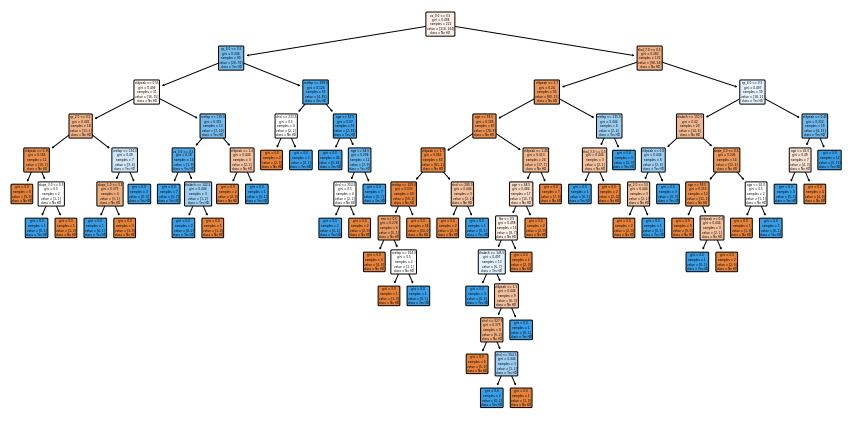

In [ ]:
# plot the tree and it is huge
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt, filled = True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)

<Figure size 1080x540 with 0 Axes>

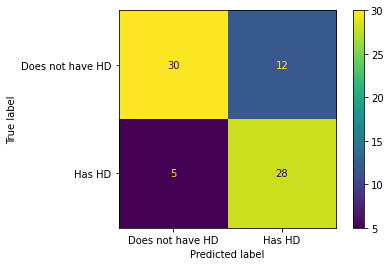

In [ ]:
plt.figure(figsize=(15,7.5))
plot_confusion_matrix(clf_dt, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

# Cost Complexity Pruning Part 1 : Visualize alpha

In [ ]:
path = clf_dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas = ccp_alphas[:-1]  # 제일 큰 알파는 제외

clf_dts = []

for ccp_alpha in ccp_alphas :
    clf_dt = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf_dt.fit(X_train, y_train)
    clf_dts.append(clf_dt)                                

In [ ]:
for elem in clf_dts:
  print(elem)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.0029529529529529544, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=0, splitter='best')
DecisionTreeClassifier(ccp_alpha=0.003861003861003862, class_weight=None,
                       criterion='gini', max_depth=None, max

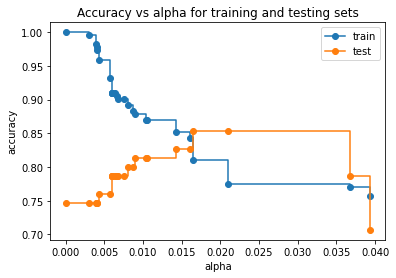

In [ ]:
train_scores = [clf_dt.score(X_train, y_train) for clf_dt in clf_dts]
test_scores = [clf_dt.score(X_test, y_test) for clf_dt in clf_dts]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker = "o", label = 'train', drawstyle = 'steps-post')
ax.plot(ccp_alphas, test_scores, marker = "o", label = 'test', drawstyle = 'steps-post')
ax.legend()
plt.show()

# Cost Complexity Pruning Part 2 : Cross Validation for Finding the Best Alpha

위에서 0.016에서의 테스팅 정확도가 트레이닝 정확도보다 증가했으니 괜찮지 않을까 싶었지만, 아래의 그래프는 데이터셋에 트리가 민감함을 보여줌-->잘 일반화하지 못함

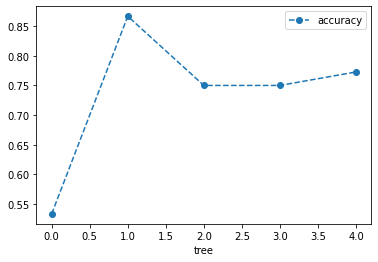

In [ ]:
clf_dt = DecisionTreeClassifier(random_state=42, ccp_alpha=0.016)

scores = cross_val_score(clf_dt, X_train, y_train, cv =5)
df = pd.DataFrame(data={'tree': range(5), 'accuracy': scores})

df.plot(x='tree', y='accuracy', marker = 'o', linestyle='--')

그래서 최적의 alpha를 찾고자함

/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)
/usr/local/lib/python3.7/dist-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) a

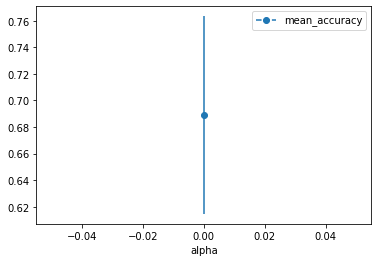

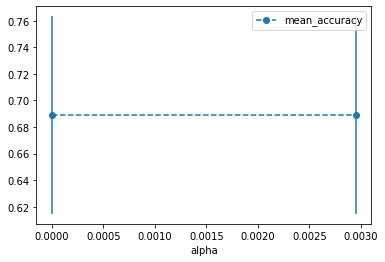

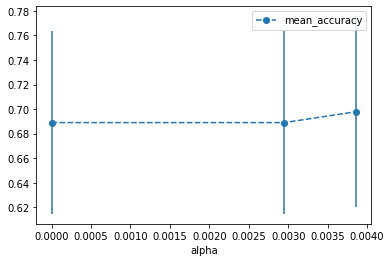

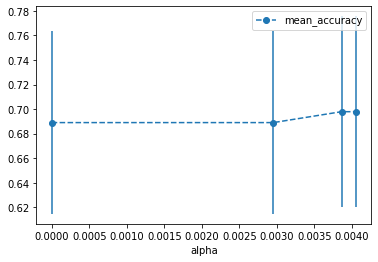

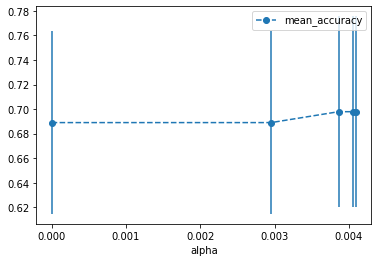

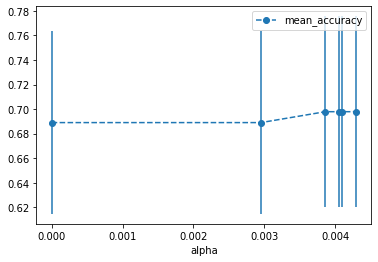

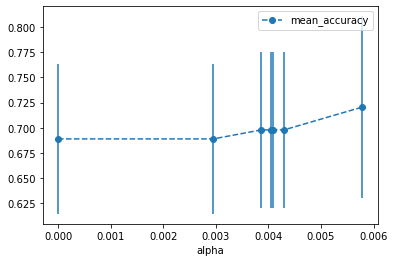

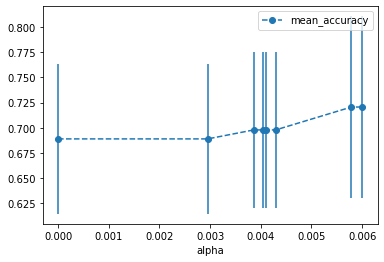

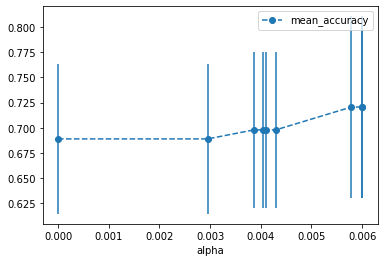

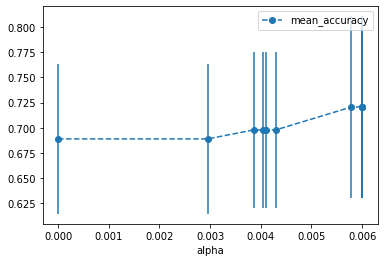

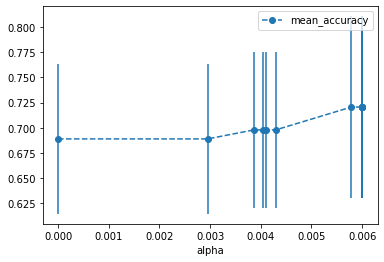

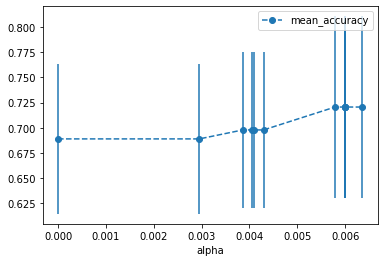

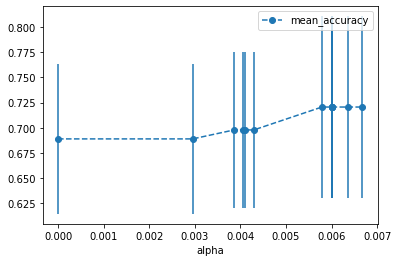

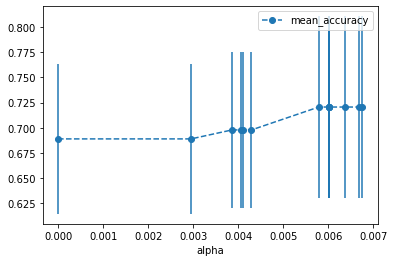

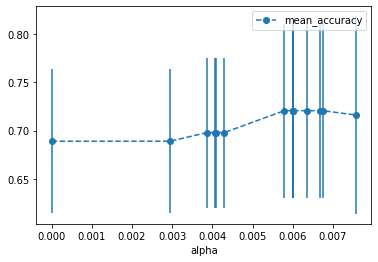

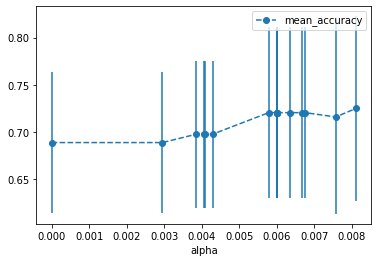

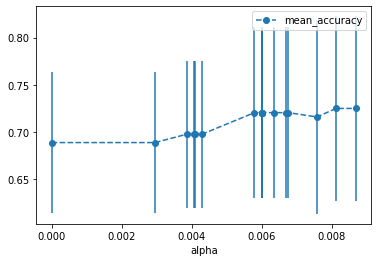

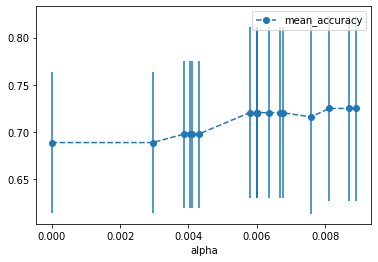

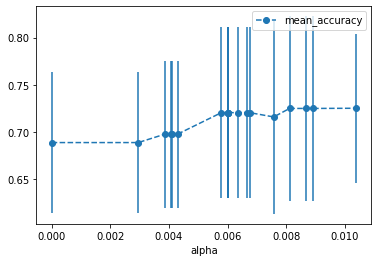

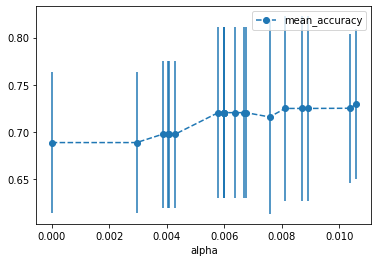

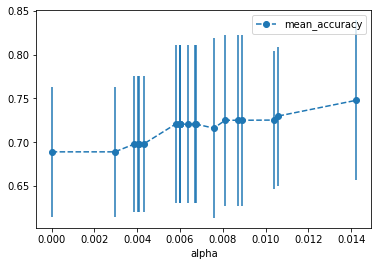

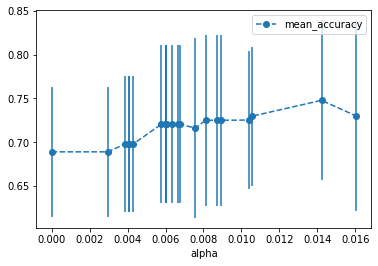

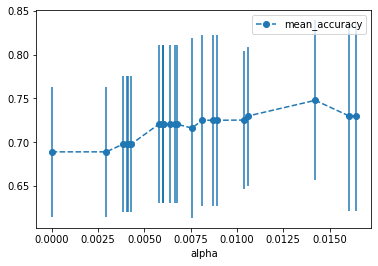

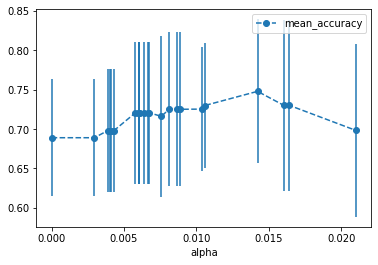

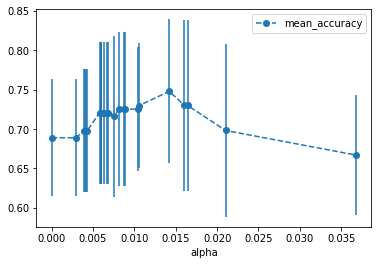

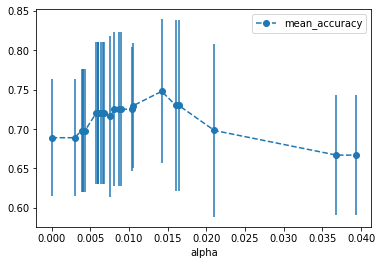

In [ ]:
alpha_loop_values = []

for ccp_alpha in ccp_alphas:
  clf_dt = DecisionTreeClassifier(random_state= 0, ccp_alpha= ccp_alpha)
  scores = cross_val_score(clf_dt, X_train, y_train, cv = 5)
  alpha_loop_values.append([ccp_alpha, np.mean(scores), np.std(scores)])

  alpha_results = pd.DataFrame(alpha_loop_values, columns = ['alpha', 'mean_accuracy', 'std'])

  alpha_results.plot(
      x = 'alpha', y='mean_accuracy', yerr='std', marker='o', linestyle ='--'
  )

위의 그래프 중 마지막 그래프를 보면 cross validation을 한 결과, 0.016 보다는 0.014에 가까운 어떤 수를 쓰는게 낫다는 것을 알 수 있다.

In [ ]:
alpha_results[(alpha_results['alpha'] > 0.014)&(alpha_results['alpha'] < 0.015)]

,alpha,mean_accuracy,std
20,0.014225,0.747778,0.091395


In [ ]:
ideal_ccp_alpha = alpha_results[(alpha_results['alpha'] > 0.014)&(alpha_results['alpha'] < 0.015)]['alpha']

In [ ]:
ideal_ccp_alpha

20    0.014225
Name: alpha, dtype: float64

In [ ]:
ideal_ccp_alpha = float(ideal_ccp_alpha)
ideal_ccp_alpha

0.014224751066856332

# Building, Evaluating, Drawing, and Interpreting the Final Classification Tree

In [ ]:
clf_dt_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ideal_ccp_alpha)
clf_dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.014224751066856332, class_weight=None,
                       criterion='gini', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=42, splitter='best')

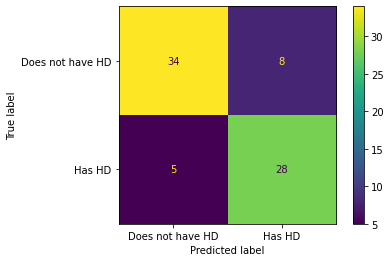

In [ ]:
plot_confusion_matrix(clf_dt_pruned, X_test, y_test, display_labels=["Does not have HD", "Has HD"])

[Text(383.625, 356.7375, 'ca_0.0 <= 0.5\ngini = 0.498\nsamples = 222\nvalue = [118, 104]\nclass = No HD'),
 Text(209.25, 254.8125, 'cp_4.0 <= 0.5\ngini = 0.346\nsamples = 90\nvalue = [20, 70]\nclass = Yes HD'),
 Text(139.5, 152.8875, 'oldpeak <= 0.55\ngini = 0.499\nsamples = 31\nvalue = [16, 15]\nclass = No HD'),
 Text(69.75, 50.96249999999998, 'gini = 0.401\nsamples = 18\nvalue = [13, 5]\nclass = No HD'),
 Text(209.25, 50.96249999999998, 'gini = 0.355\nsamples = 13\nvalue = [3, 10]\nclass = Yes HD'),
 Text(279.0, 152.8875, 'gini = 0.126\nsamples = 59\nvalue = [4, 55]\nclass = Yes HD'),
 Text(558.0, 254.8125, 'thal_7.0 <= 0.5\ngini = 0.382\nsamples = 132\nvalue = [98, 34]\nclass = No HD'),
 Text(418.5, 152.8875, 'oldpeak <= 2.7\ngini = 0.24\nsamples = 93\nvalue = [80, 13]\nclass = No HD'),
 Text(348.75, 50.96249999999998, 'gini = 0.185\nsamples = 87\nvalue = [78, 9]\nclass = No HD'),
 Text(488.25, 50.96249999999998, 'gini = 0.444\nsamples = 6\nvalue = [2, 4]\nclass = Yes HD'),
 Text(69

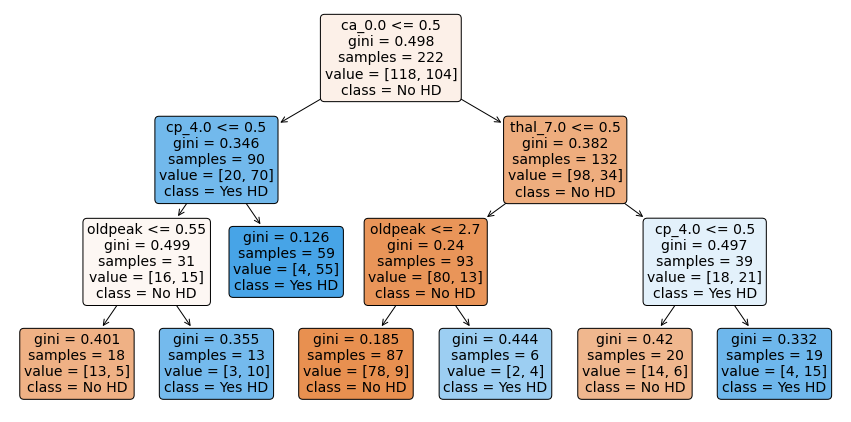

In [ ]:
plt.figure(figsize=(15,7.5))
plot_tree(clf_dt_pruned, filled = True, rounded=True, class_names=["No HD", "Yes HD"], feature_names=X_encoded.columns)